# Modelling 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, roc_auc_score
)

import joblib

## loading datasets & further pre-processing

In [9]:
train_df = pd.read_csv(r'..\5. Modelling\train_data.csv', header=0)
test_df = pd.read_csv(r'..\5. Modelling\test_data.csv', header=0)

train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    4882 non-null   object 
 1   Target  4882 non-null   float64
dtypes: float64(1), object(1)
memory usage: 76.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    1221 non-null   object 
 1   Target  1221 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [10]:
# seperate features and labels
X_train_raw = train_df['Text']
Y_train_raw = train_df['Target']

X_test_raw = test_df['Text']
Y_test_raw = test_df['Target']

In [11]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(Y_train_raw)
y_test = label_encoder.transform(Y_test_raw)

In [12]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [13]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32516 stored elements and shape (1221, 5000)>
  Coords	Values
  (0, 1)	0.1830759569236709
  (0, 372)	0.20092966644023538
  (0, 934)	0.18399186412190188
  (0, 1110)	0.19506797473032672
  (0, 1264)	0.20258848191196932
  (0, 1380)	0.19785904461765177
  (0, 1514)	0.09045152071874789
  (0, 1628)	0.20258848191196932
  (0, 1668)	0.15496359592325679
  (0, 1990)	0.1937622196866929
  (0, 2095)	0.1683194210380363
  (0, 2720)	0.1433776666922395
  (0, 2815)	0.15760036232039037
  (0, 2922)	0.1467755863982662
  (0, 3054)	0.17886654246221534
  (0, 3120)	0.17249603954486795
  (0, 3150)	0.15496359592325679
  (0, 3242)	0.20818221896992867
  (0, 3304)	0.14387654943425662
  (0, 3361)	0.18132230177014438
  (0, 3516)	0.19506797473032672
  (0, 3517)	0.1964317820384504
  (0, 3561)	0.1859100269758894
  (0, 3562)	0.1758709343998108
  (0, 3691)	0.20092966644023538
  :	:
  (1219, 4364)	0.07966715694961363
  (1219, 4380)	0.10595473389188499
  (1219, 4390

In [100]:
# Save vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## Using SVM

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [102]:
params_grid = [{'kernel':['rbf'], 'gamma':[1e-3,1e-4], 'C':[1,10,100,1000], 'decision_function_shape': ['ovr', 'ovo']},
               {'kernel': ['linear'], "C":[1,10,100,1000],'decision_function_shape': ['ovr', 'ovo']}]

In [103]:
svm_model = GridSearchCV(SVC(probability=True), params_grid, cv = 5)
svm_model.fit( X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'decision_function_shape': ['ovr', 'ovo'],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000],
                          'decision_function_shape': ['ovr', 'ovo'],
                          'kernel': ['linear']}])

In [104]:
print("Best parameters for SVM:", svm_model.best_params_)
best_svm_model = svm_model.best_estimator_

Best parameters for SVM: {'C': 1, 'decision_function_shape': 'ovr', 'kernel': 'linear'}


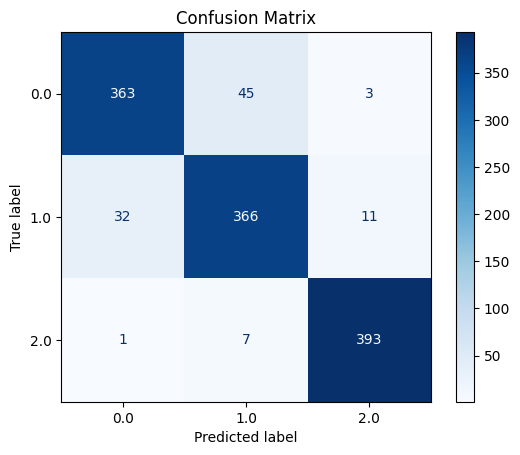

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       411
           1       0.88      0.89      0.89       409
           2       0.97      0.98      0.97       401

    accuracy                           0.92      1221
   macro avg       0.92      0.92      0.92      1221
weighted avg       0.92      0.92      0.92      1221



Accuracy:  0.9189
Precision: 0.9190
Recall:    0.9189
F1 Score:  0.9188


In [105]:
y_pred_svm = svm_model.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')
print(f"\n\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [106]:

y_score_svm = best_svm_model.predict_proba(X_test)

auc_score = roc_auc_score(y_test, y_score_svm, multi_class='ovr', average='macro')

print(f"AUC-ROC Score (macro-average): {auc_score:.4f}")

AUC-ROC Score (macro-average): 0.9806


In [1]:
#save the model
joblib.dump(svm_model, 'svm_model.pkl')


NameError: name 'joblib' is not defined

## Using Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


In [20]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    n_jobs=-1,
    verbose=2 
)

In [ ]:
# fit the model to the training set
grid_search.fit(X_train, y_train)

# check the best model
best_rf = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters:
 {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       411
           1       0.91      0.84      0.87       409
           2       0.97      0.98      0.97       401

    accuracy                           0.91      1221
   macro avg       0.92      0.92      0.91      1221
weighted avg       0.92      0.91      0.91      1221



Accuracy:  0.9148239148239148
Precision:  0.915835477445262
Recall:  0.9148239148239148
F1 Score:  0.91437481905068


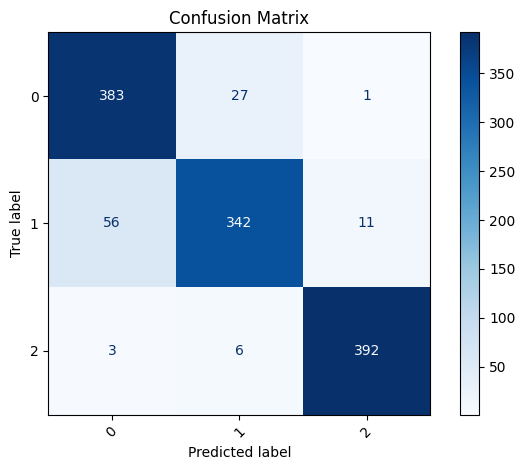

In [22]:
# Predict on test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print(f"\n\nAccuracy: ", accuracy_score(y_test, y_pred_rf))
print(f"Precision: ", precision_score(y_test, y_pred_rf, average='weighted'))
print(f"Recall: ", recall_score(y_test, y_pred_rf, average='weighted') )
print(f"F1 Score: ",  f1_score(y_test, y_pred_rf, average='weighted'))
 
# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [23]:
joblib.dump(best_rf, 'rf_model.pkl')


['rf_model.pkl']

## Multinomial Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # try various smoothing values
}

In [37]:
# Set up GridSearchCV
nb_grid = GridSearchCV(MultinomialNB(), 
                       param_grid, 
                       cv=5, 
                       scoring='accuracy', 
                       n_jobs=-1, 
                       verbose=2)
# 3. Fit the model
nb_grid.fit(X_train, y_train)

print("Best hyperparameters for MultinomialNB:", nb_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters for MultinomialNB: {'alpha': 0.01}


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       411
           1       0.81      0.92      0.86       409
           2       0.96      0.96      0.96       401

    accuracy                           0.90      1221
   macro avg       0.91      0.90      0.90      1221
weighted avg       0.91      0.90      0.90      1221



Accuracy:  0.9009009009009009
Precision:  0.9071564150164785
Recall:  0.9009009009009009
F1 Score:  0.9012427486356661


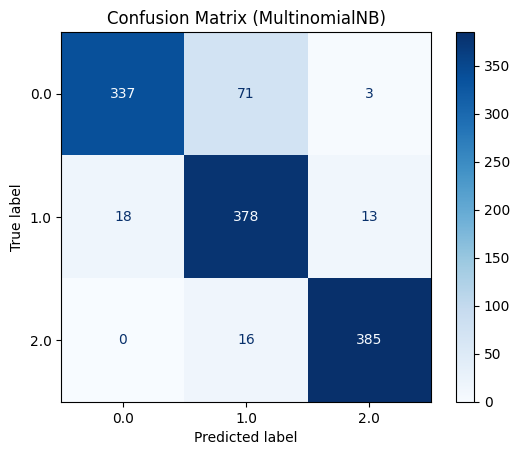

In [38]:
# Predict on test data
best_nb = nb_grid.best_estimator_
y_pred_nb = best_nb.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print(f"\n\nAccuracy: ", accuracy_score(y_test, y_pred_nb))
print(f"Precision: ", precision_score(y_test, y_pred_nb, average='weighted'))
print(f"Recall: ", recall_score(y_test, y_pred_nb, average='weighted') )
print(f"F1 Score: ",  f1_score(y_test, y_pred_nb, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (MultinomialNB)")
plt.show()


In [39]:
joblib.dump(best_nb, 'nb_model.pkl')

['nb_model.pkl']

## Logistic regression

In [46]:

from sklearn.linear_model import LogisticRegression

In [47]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],             
    'solver': ['lbfgs'],           # 'lbfgs' handles multiclass well
    'max_iter': [500]
}

In [48]:
# Initialize GridSearchCV
logreg_grid = GridSearchCV(LogisticRegression(multi_class='ovr'), 
                           param_grid, 
                           cv=5, 
                           n_jobs=-1,
                           verbose=2)

# Fit model
logreg_grid.fit(X_train, y_train)

print("Best parameters:", logreg_grid.best_params_)

best_logreg = logreg_grid.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       411
           1       0.89      0.87      0.88       409
           2       0.97      0.98      0.98       401

    accuracy                           0.92      1221
   macro avg       0.92      0.92      0.92      1221
weighted avg       0.92      0.92      0.92      1221


Accuracy:  0.9164619164619164
Precision:  0.9163009516682272
Recall:  0.9164619164619164
F1 Score:  0.9163562973807484


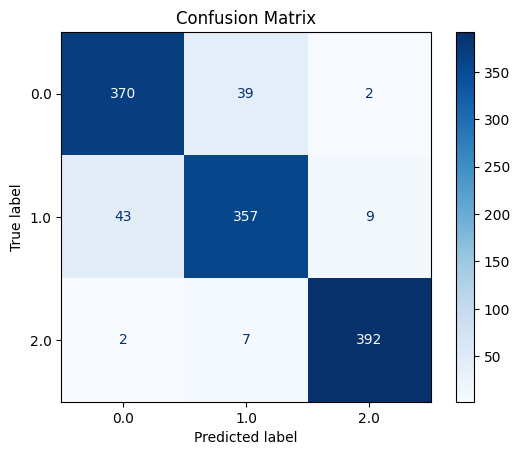

In [49]:
# Predict
y_pred_logreg = best_logreg.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, average='weighted')
recall = recall_score(y_test, y_pred_logreg, average='weighted')
f1 = f1_score(y_test, y_pred_logreg, average='weighted')

#confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))
print(f"\nAccuracy: ", accuracy_score(y_test, y_pred_logreg))
print(f"Precision: ", precision_score(y_test, y_pred_logreg, average='weighted'))
print(f"Recall: ", recall_score(y_test, y_pred_logreg, average='weighted') )
print(f"F1 Score: ",  f1_score(y_test, y_pred_logreg, average='weighted'))

#confusion matric
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [51]:
joblib.dump(best_logreg, 'logreg_model.pkl')

['logreg_model.pkl']